# Forecast of Medical Expenditure by using Linear Regression - Ganesh Shetty

## Introduction
To make profit, insurance companies should collect higher premium than the amount paid to the insured person. Due to this, insurance companies invests a lot of time, effort, and money in creating models that accurately predicts health care costs. In this kernel, I will try to build time and cost efficient model using linear regression to predict Medical Expenditure.

## 1. Reading and Understanding the Data

Let us first import necessary libraries, dataset and try to understand the data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Import all important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load the dataset and check initial entries of the dataset
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Shape of the dataset
df.shape

(1338, 7)

In [4]:
#Information Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#Checking for Null Values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Observation:** There no missing values in the dataset. Lets check for outliers in the dataset

## 2. Cleaning the data

### 2.1 Checking for Outliers

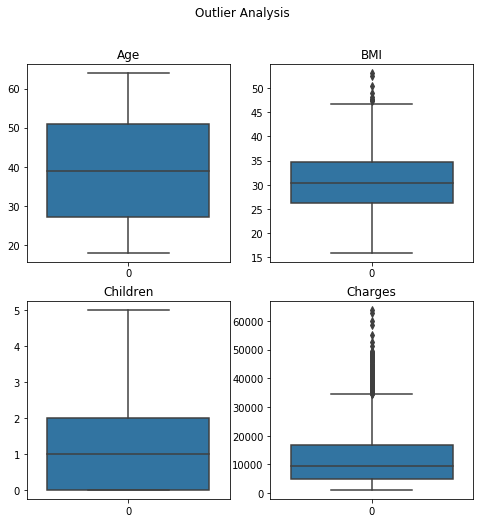

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

fig.suptitle('Outlier Analysis')
sns.boxplot(ax=axes[0, 0], data=df['age'])
axes[0, 0].set_title('Age')
sns.boxplot(ax=axes[0, 1], data=df['bmi'])
axes[0, 1].set_title('BMI')
sns.boxplot(ax=axes[1, 0], data=df['children'])
axes[1, 0].set_title('Children')
sns.boxplot(ax=axes[1, 1], data=df['charges'])
axes[1, 1].set_title('Charges')

plt.show()

**Observation:** There are no outliers in the numerical variables of the dataset. The datapoints beyond 75th percentile in Charges and BMI are continuous in nature. This is quite clean dataset without outliers.

## 3. Exploratory Data Analysis

### 3.1 Bivariate Analysis

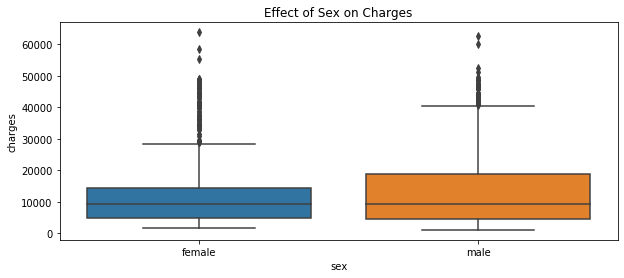

In [7]:
plt.figure(figsize=(10,4))
plt.title('Effect of Sex on Charges')
sns.boxplot(x='sex',y='charges',data=df)
plt.show()

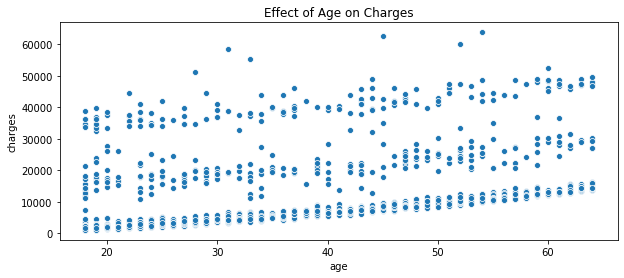

In [8]:
plt.figure(figsize=(10,4))
plt.title('Effect of Age on Charges')
sns.scatterplot(x='age',y='charges',data=df)
plt.show()

**Observation:** Males are spending more than females for healthcare. Another obvious observation is healthcare expenditure is continuously increasing with age

### 3.2 Multivariate Analysis

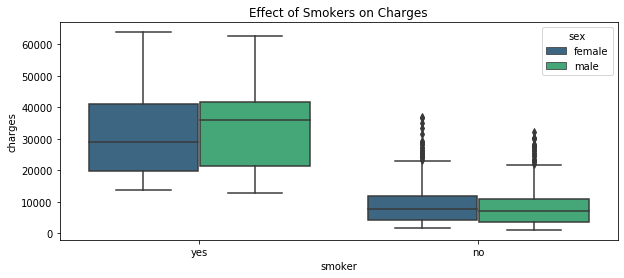

In [9]:
plt.figure(figsize=(10,4))
plt.title('Effect of Smokers on Charges')
sns.boxplot(x='smoker',y='charges',data=df,hue='sex',palette='viridis')
plt.show()

**Observation:** 
- Smokers are spending more in hospital. 
- Majority of spendings by non-smokers between males and females are in the similar rages. Females spend fractionally higher
- However among smokers males endup spending more in hospital

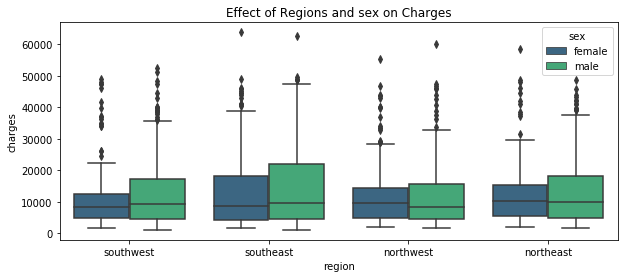

In [10]:
plt.figure(figsize=(10,4))
plt.title('Effect of Regions and sex on Charges')
sns.boxplot(x='region',y='charges',data=df,hue='sex',palette='viridis')
plt.show()

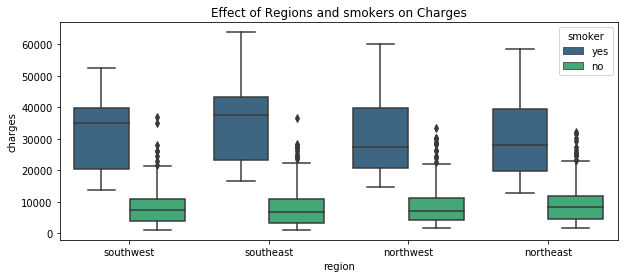

In [11]:
plt.figure(figsize=(10,4))
plt.title('Effect of Regions and smokers on Charges')
sns.boxplot(x='region',y='charges',data=df,hue='smoker',palette='viridis')
plt.show()

**Observation:** 
- People in Southeast spend more on healthcare compared to other regions
- Irrespective of regions generally its males who are spending more in hospitals
- Again irrespective of regions its smokers who spend heavily in hospitals. Here as well Southeast region has upper hand over other regions

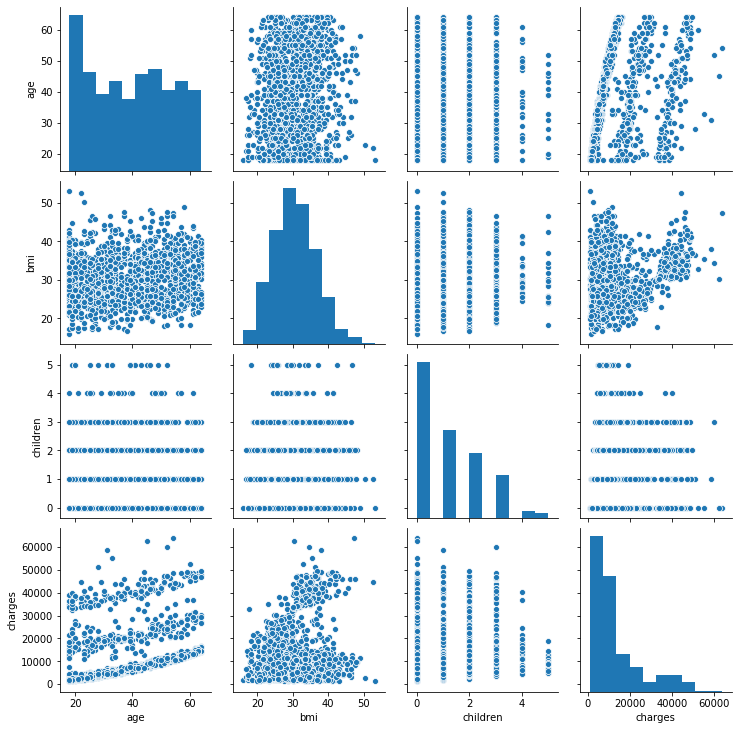

In [12]:
# Lets check the correlation of different variables
sns.pairplot(df)
plt.show()

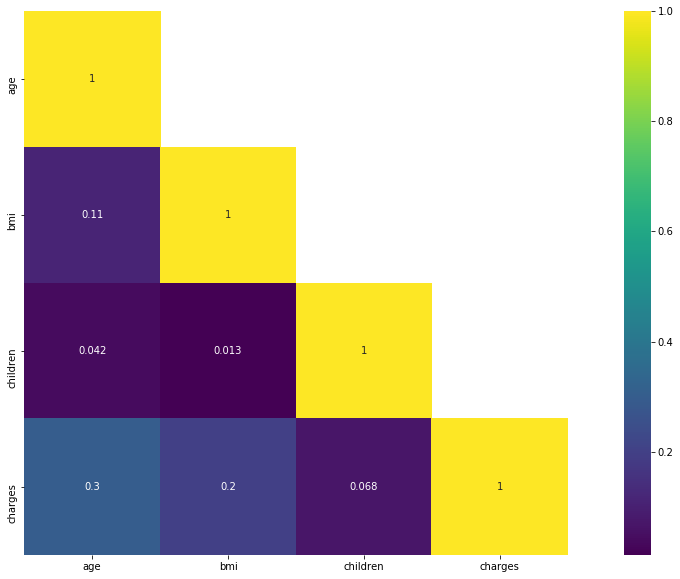

In [13]:
#Heatmap of variables to check correlation between variables
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,cmap='viridis', square=True,annot=True)
plt.show()

**Observation:** We can observe some kind of linear relationship between `age` and `charges`

## 4. Preparation of dataset for Model Building

In [14]:
#First few lines of data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 4.1 Handling Categorical Variables

In [15]:
# Lets convert Sex and Smoker as binary categorical variables(Male: 1, Female: 0  & Smoker_yes: 1 , Smoker_no: 0)
df.sex=df.sex.apply(lambda x: 1 if x=='male' else 0)
df.smoker=df.smoker.apply(lambda x: 1 if x=='yes' else 0)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [16]:
# Lets convert region as dummy variables
region = pd.get_dummies(df['region'], drop_first = True,prefix='region')
df = pd.concat([df, region], axis = 1)

#Dropping season variable
df.drop('region',axis=1,inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


### 4.2 Splitting the Data into Training and Testing Sets

In [17]:
# Lets split the data into Training and testing sets (70%-30% combination)
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### 4.3 Rescaling the Features

We see that charges, age and BMI variables are in larger scale compared to other. Lets scale Training data sets using minmax scaler

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['charges', 'age', 'bmi']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
966,0.717391,1,0.237692,2,1,0.364661,1,0,0
522,0.717391,0,0.483051,0,0,0.139579,0,0,0
155,0.565217,1,0.633844,0,0,0.093008,1,0,0
671,0.239130,0,0.408932,0,0,0.045040,0,0,0
1173,0.434783,1,0.357815,2,0,0.085173,1,0,0


### 4.4 Dividing into X and Y sets for the model building

In [19]:
y_train = df_train.pop('charges')
X_train = df_train

## 5. Building the Model - Considering all variables

Lets build the model with all variables first and then compare the performance with the model with eliminated features

### 5.1 Fitting Linear regression model onto Train data

In [20]:
# Importing LinearRegression
from sklearn.linear_model import LinearRegression

# Fitting LinearRegression onto the train data
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### 5.2 Making Predictions Using the  Model
#### 5.2.1 Applying the scaling on the test sets. Only transforming not fitting

In [21]:
num_vars = ['charges', 'age', 'bmi']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### 5.2.2 Dividing into X_test and y_test

In [22]:
y_test = df_test.pop('charges')
X_test = df_test

#### 5.2.3 Model Evaluation

In [23]:
# Making predictions using the third model
y_pred = lm.predict(X_test)

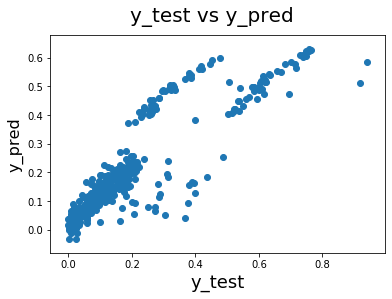

In [24]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize = 20) 
# X-label
plt.xlabel('y_test', fontsize = 18) 
# y-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7772310511733103

**Observation:** We now have a model with r2_score of **77.7%** which is not bad. Lets now try to check the possibility of building mode efficient model(devoid of insignificant variables and multicolinearity)

## 6. Building the Model - Considering significant variables and avoiding Multicolinearity if any

### 6.1 Splitting the Data into Training and Testing Sets

In [26]:
# Lets split the data into Training and testing sets (70%-30% combination)
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### 6.2 Rescaling the Features

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['charges', 'age', 'bmi']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
966,0.717391,1,0.237692,2,1,0.364661,1,0,0
522,0.717391,0,0.483051,0,0,0.139579,0,0,0
155,0.565217,1,0.633844,0,0,0.093008,1,0,0
671,0.239130,0,0.408932,0,0,0.045040,0,0,0
1173,0.434783,1,0.357815,2,0,0.085173,1,0,0


### 6.3  Dividing into X and Y sets for the model building

In [28]:
y_train = df_train.pop('charges')
X_train = df_train

### 6.4 Fitting Linear regression model onto Train data

Lets use stats model library for its great statistical output

In [29]:
#Lets have a backup of X_train data
X_train_bc=X_train.copy()

In [30]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_bc)

# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     326.2
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          2.08e-263
Time:                        18:41:29   Log-Likelihood:                 835.42
No. Observations:                 936   AIC:                            -1653.
Df Residuals:                     927   BIC:                            -1609.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0332      0.011  

In [31]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_bc
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,bmi,5.08
0,age,2.93
6,region_southeast,2.21
1,sex,1.88
7,region_southwest,1.82
3,children,1.78
5,region_northwest,1.71
4,smoker,1.24


**Observation:** As we can see `sex` with p-value of 1.00 (much higher than 0.03) is highly insignificant. Lets drop this variable and rebuild the model again

In [32]:
#dropping sex variable
X_train_bc = X_train_bc.drop(['sex'], axis=1)

In [33]:
#Rebuilding second model

# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_bc)

# Running the linear model
lm2 = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     373.2
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          1.04e-264
Time:                        18:41:29   Log-Likelihood:                 835.42
No. Observations:                 936   AIC:                            -1655.
Df Residuals:                     928   BIC:                            -1616.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0332      0.011  

In [34]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_bc
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bmi,4.82
0,age,2.91
5,region_southeast,2.20
6,region_southwest,1.81
2,children,1.76
4,region_northwest,1.69
3,smoker,1.23


**Observation:** We can see that after dropping `sex` we have no alarming multicolinearity in the model(all VIFs are less than 5). We can also see that Adj. R-squared has not changed. We still have `region_northwest` & `region_southeast` as insignificant (p-value more than 0.03). We shall drop `region_northwest` and rebuild the model

In [35]:
#dropping region_northwest variable
X_train_bc = X_train_bc.drop(['region_northwest'], axis=1)

In [36]:
#Rebuilding third model

# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_bc)

# Running the linear model
lm3 = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     434.8
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          1.07e-265
Time:                        18:41:29   Log-Likelihood:                 834.59
No. Observations:                 936   AIC:                            -1655.
Df Residuals:                     929   BIC:                            -1621.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0391      0.010  

In [37]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_bc
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bmi,4.21
0,age,2.80
4,region_southeast,1.75
2,children,1.73
5,region_southwest,1.48
3,smoker,1.22


**Observation:** We can see that after dropping `region_northwest` we have no alarming multicolinearity in the model(all VIFs are less than 5). We can also see that Adj. R-squared has not changed. We still have `region_southeast` as insignificant (p-value more than 0.03). We shall drop `region_southeast` and rebuild the model

In [38]:
#dropping region_southeast variable
X_train_bc = X_train_bc.drop(['region_southeast'], axis=1)

In [39]:
#Rebuilding fourth model

# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_bc)

# Running the linear model
lm4 = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     521.4
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          8.06e-267
Time:                        18:41:30   Log-Likelihood:                 834.00
No. Observations:                 936   AIC:                            -1656.
Df Residuals:                     930   BIC:                            -1627.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0400      0.010  

In [40]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_bc
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bmi,3.30
0,age,2.80
2,children,1.73
4,region_southwest,1.29
3,smoker,1.21


**Observation:** We can see that after dropping `region_southeast` we have no alarming multicolinearity in the model(all VIFs are less than 5). We can also see that Adj. R-squared has not changed. We still have `region_southwest` as insignificant (p-value more than 0.03). We shall drop `region_southwest` and rebuild the model

In [41]:
#dropping region_southwest variable
X_train_bc = X_train_bc.drop(['region_southwest'], axis=1)

In [42]:
#Rebuilding fifth model

# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_bc)

# Running the linear model
lm5 = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     648.2
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          2.76e-267
Time:                        18:41:30   Log-Likelihood:                 831.76
No. Observations:                 936   AIC:                            -1654.
Df Residuals:                     931   BIC:                            -1629.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0435      0.010     -4.438      0.0

In [43]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_bc
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bmi,3.19
0,age,2.77
2,children,1.72
3,smoker,1.21


**Observation:** After leaving out `region_southwest` variable, we now have a model which is free of multicolinearity (alla VIFs are less than 5) and all the remaining variables are significant (p-values are less than 0.03). We can also observe that Adj. R-squared has only fractionally come down(by 0.001). Now we have a efficient model. Lets use this as final model and predict the charges for test data.

### 6.5 Making Predictions Using the Final Model

#### 6.5.1 Applying the scaling on the test sets. Only transforming not fitting

In [44]:
num_vars = ['charges', 'age', 'bmi']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.describe()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.467662,0.522388,0.387383,1.077114,0.228856,0.197677,0.238806,0.248756,0.243781
std,0.304236,0.500121,0.156621,1.205359,0.420620,0.192579,0.426885,0.432831,0.429897
min,0.000000,0.000000,0.023002,0.000000,0.000000,0.000154,0.000000,0.000000,0.000000
25%,0.195652,0.000000,0.278585,0.000000,0.000000,0.060686,0.000000,0.000000,0.000000
50%,0.478261,1.000000,0.383105,1.000000,0.000000,0.138259,0.000000,0.000000,0.000000
75%,0.733696,1.000000,0.483051,2.000000,0.000000,0.254641,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.890503,5.000000,1.000000,0.940158,1.000000,1.000000,1.000000


#### 6.5.2 Dividing into X_test and y_test

In [45]:
y_test = df_test.pop('charges')
X_test = df_test

#### 6.5.3 Preparing the test dataset

In [46]:
# Adding constant variable to test dataframe
import statsmodels.api as sm 
X_test_m5 = sm.add_constant(X_test)

# Creating X_test_m5 dataframe by dropping variables from X_test_m5
X_test_m5 = X_test_m5.drop(['sex', 'region_northwest', 'region_southeast', 'region_southwest'], axis = 1)

# Making predictions using the fifth model
y_pred = lm5.predict(X_test_m5)

### 6.6 Model Evaluation

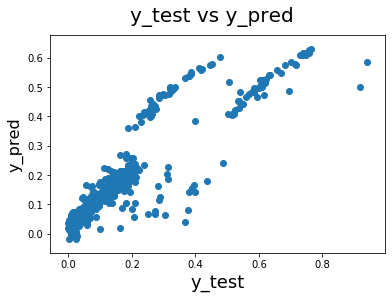

In [47]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize = 20) 
# X-label
plt.xlabel('y_test', fontsize = 18) 
# y-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [48]:
#Model parameters
round(lm5.params,3)

const      -0.043
age         0.191
bmi         0.165
children    0.007
smoker      0.383
dtype: float64

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7801257218275263

**Conclusion:** The model now has fewer variables (4 insignificant variables are left out). We now have a R2_squared value of **78%**. 

This model has a R2_square value marginally better than previous model (With all variables). Now the model has no insignificant variables hence making it cost and time effective.

The final equation of the model is

$ charges = -0.043 + 0.191  \times  age + 0.165  \times  bmi + 0.007 \times children + 0.383 \times smoker $ 

**`Smoker`** turned out to be the most significant variable in deciding hospital charges